In [1]:
import tensorflow as tf

2022-05-31 07:21:43.081268: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-31 07:21:43.081296: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
(x_train , y_train) , (x_test , y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train[0].shape  # Dimension of datasets

(28, 28)

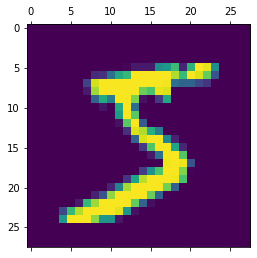

In [5]:
plt.matshow(x_train[0])  

In [6]:
y_train[0]

5

### Converting 28*28 into 1D Array

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
# Scalling values from range 0~1 by dividing each individual array by 255
# As dataset only consist values from 0 -> black , 255 -> white
x_train = x_train / 255
x_test = x_test / 255

# It imporves accuracy of model

In [10]:
# Flattning dataset
x_train_flattened = x_train.reshape(len(x_train) , 28*28 )
x_test_flattened = x_test.reshape(len(x_test) , 28*28 )

**Here first argument is len(train sample) and the second argument is dimension of array**

In [11]:
x_train_flattened.shape

(60000, 784)

## Training Model

In [14]:
model = keras.Sequential(
    [
        keras.layers.Dense(10 , input_shape = (784 ,) , activation = 'sigmoid')
    ]
)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

model.fit(x_train_flattened , y_train , epochs=5)

Epoch 1/5


2022-05-31 07:23:14.981326: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 2s 1ms/step - loss: 0.4731 - accuracy: 0.8753
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3033 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2830 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9255


Here 10 means 10 neurons <br>
And input_shape -> 784 features<br>
Dense -> Every weight is connected to all neurons<br>

In [15]:
# Finding accuracy of model

model.evaluate(x_test_flattened , y_test)


313/313 [==============================] - 0s 873us/step - loss: 0.2670 - accuracy: 0.9256


[0.2669893503189087, 0.925599992275238]

In [16]:
model.predict(x_test_flattened)

313/313 [==============================] - 0s 682us/step


array([[1.54875200e-02, 3.64113816e-07, 6.35536984e-02, ...,
        9.99817908e-01, 1.08386949e-01, 7.79477775e-01],
       [3.47513378e-01, 4.76236315e-03, 9.99285161e-01, ...,
        1.10929961e-12, 1.41304702e-01, 2.10646989e-09],
       [2.61363952e-04, 9.91560757e-01, 5.89590430e-01, ...,
        1.20103046e-01, 3.72929752e-01, 4.38277684e-02],
       ...,
       [2.03745822e-06, 3.68241831e-06, 1.11691887e-03, ...,
        2.73516774e-01, 6.00173593e-01, 8.48331213e-01],
       [6.96570933e-05, 1.14882649e-04, 1.17709904e-04, ...,
        3.81182617e-05, 6.44525528e-01, 1.01288504e-04],
       [3.84181738e-03, 2.33111003e-10, 1.57104760e-01, ...,
        1.13308332e-08, 1.79248149e-04, 7.51489608e-07]], dtype=float32)

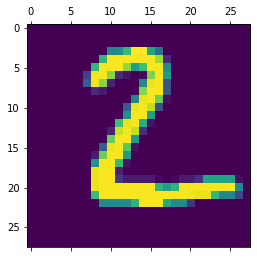

In [17]:
plt.matshow(x_test[1])

In [18]:
y_pred = model.predict(x_test_flattened)

313/313 [==============================] - 0s 713us/step


In [19]:
y_pred[1]
# It gives 10 sigmoid function scores

array([3.4751338e-01, 4.7623632e-03, 9.9928516e-01, 2.7201197e-01,
       4.1699610e-10, 8.3120030e-01, 8.4809995e-01, 1.1092996e-12,
       1.4130470e-01, 2.1064699e-09], dtype=float32)

In [20]:
# Maximum score is our prediction

np.argmax(y_pred[1])

2

## Confusion Matrix

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_pred]

In [23]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 950,    0,    1,    2,    0,    6,   16,    3,    2,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   4,    9,  921,   17,    8,    2,   14,   11,   41,    5],
       [   2,    0,   16,  922,    0,   21,    5,   11,   23,   10],
       [   1,    1,    3,    1,  912,    0,   16,    4,   10,   34],
       [   7,    2,    3,   34,   11,  761,   22,    9,   36,    7],
       [   7,    3,    4,    1,    6,    7,  926,    2,    2,    0],
       [   1,    5,   24,    3,    8,    0,    0,  947,    2,   38],
       [   5,    6,    5,   16,    9,   19,   10,   11,  884,    9],
       [   9,    6,    1,   10,   24,    4,    1,   20,    9,  925]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

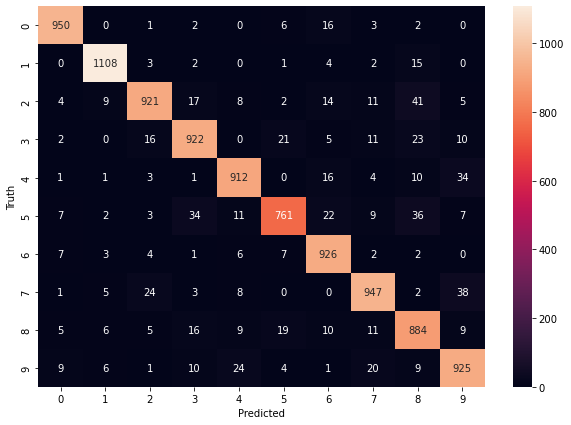

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h1 style='color:purple'>Using hidden layer</h1>

In [27]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5


2022-05-31 07:37:19.694374: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.2770 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1269 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0885 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0671 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0522 - accuracy: 0.9837


In [29]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0796 - accuracy: 0.9745


[0.07961281388998032, 0.9745000004768372]

313/313 [==============================] - 0s 903us/step


Text(69.0, 0.5, 'Truth')

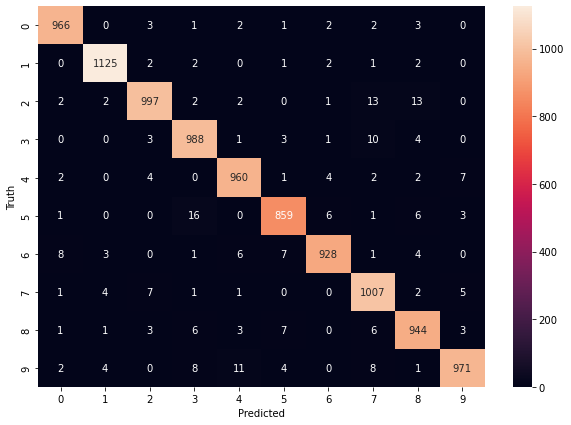

In [31]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10


2022-05-31 07:39:19.432999: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.2705 - accuracy: 0.9245
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1215 - accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0836 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0635 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0499 - accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0405 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0324 - accuracy: 0.9903
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0273 - accuracy: 0.9912
Epoch 9/10
 876/1875 [=============>................] - ETA: 1s - loss: 0.0206 - accuracy: 0.9936

In [ ]:
model.evaluate(X_test,y_test)